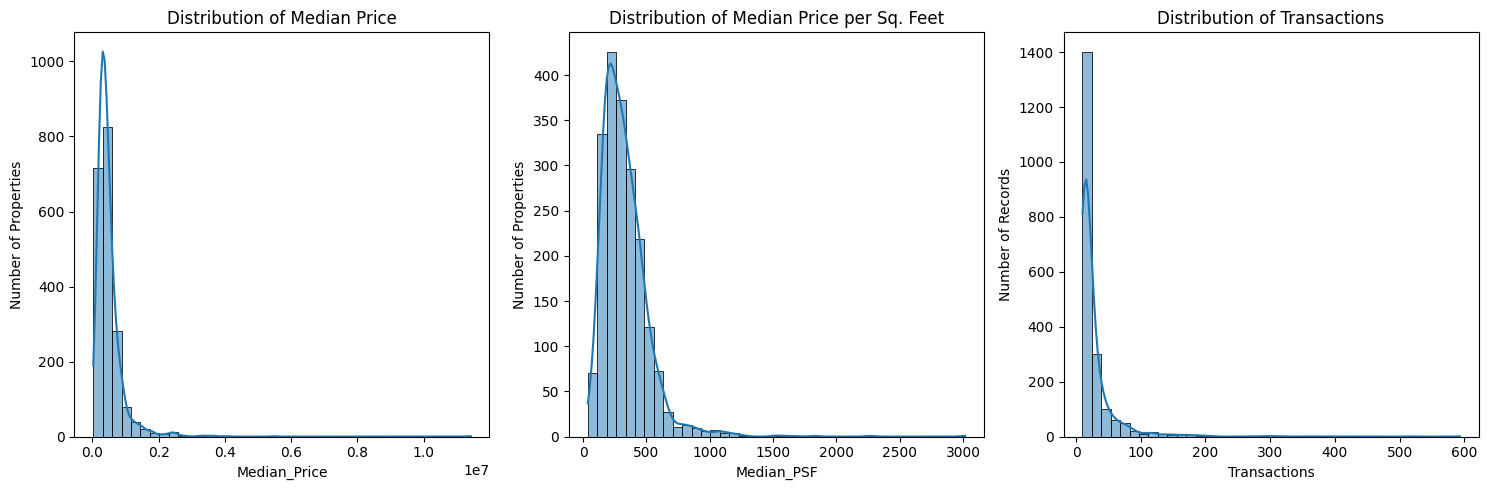

Median_Price    8.826323
Median_PSF      3.452519
Transactions    6.552555
dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load downloaded CSV file

raw_csv_data=pd.read_csv("malaysia_house_price_data_2025.csv")
df=raw_csv_data.copy()

# Set the figure size
plt.figure(figsize=(15, 5))

# 'Median_Price' distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Median_Price'], kde=True, bins=40)
plt.title('Distribution of Median Price')
plt.xlabel('Median_Price')
plt.ylabel('Number of Properties')

# 'Median_PSF' distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Median_PSF'], kde=True, bins=40)
plt.title('Distribution of Median Price per Sq. Feet')
plt.xlabel('Median_PSF')
plt.ylabel('Number of Properties') 

# 'Transactions' distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Transactions'], kde=True, bins=40)
plt.title('Distribution of Transactions')
plt.xlabel('Transactions')
plt.ylabel('Number of Records')
plt.tight_layout()
plt.show()

# Check skewness of selected columns
skewness = df[['Median_Price', 'Median_PSF', 'Transactions']].skew()
print(skewness)


In [4]:
# Describe the dataset in terms of statistical terms
df.describe()

,Median_Price,Median_PSF,Transactions
count,2.000000e+03,2000.000000,2000.000000
mean,4.906854e+05,328.862500,28.091500
std,4.686322e+05,193.281739,37.702385
min,2.704900e+04,38.000000,10.000000
25%,2.699500e+05,201.000000,12.000000
50%,3.900000e+05,293.000000,16.000000
75%,5.735000e+05,412.000000,28.000000
max,1.142050e+07,3017.000000,593.000000


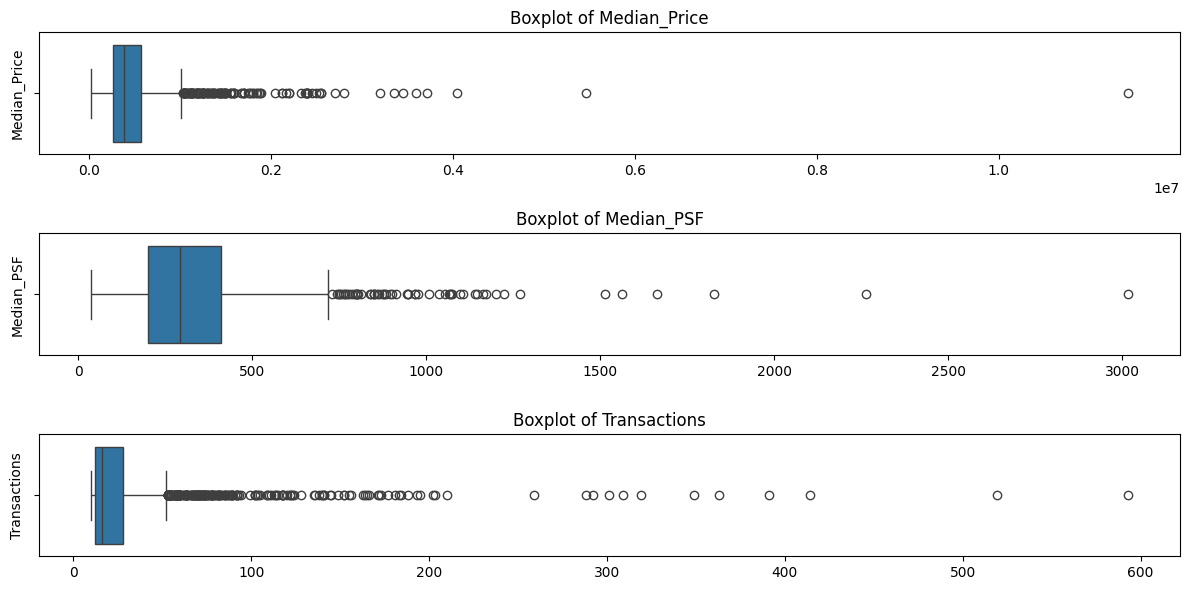

In [5]:
# Bloxplot used to visually display Quartile 1, 3, Interquartile Range, Median & data outliers (for each numerical column)
plt.figure(figsize=(12, 6))
numerical_cols = ['Median_Price', 'Median_PSF', 'Transactions']

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

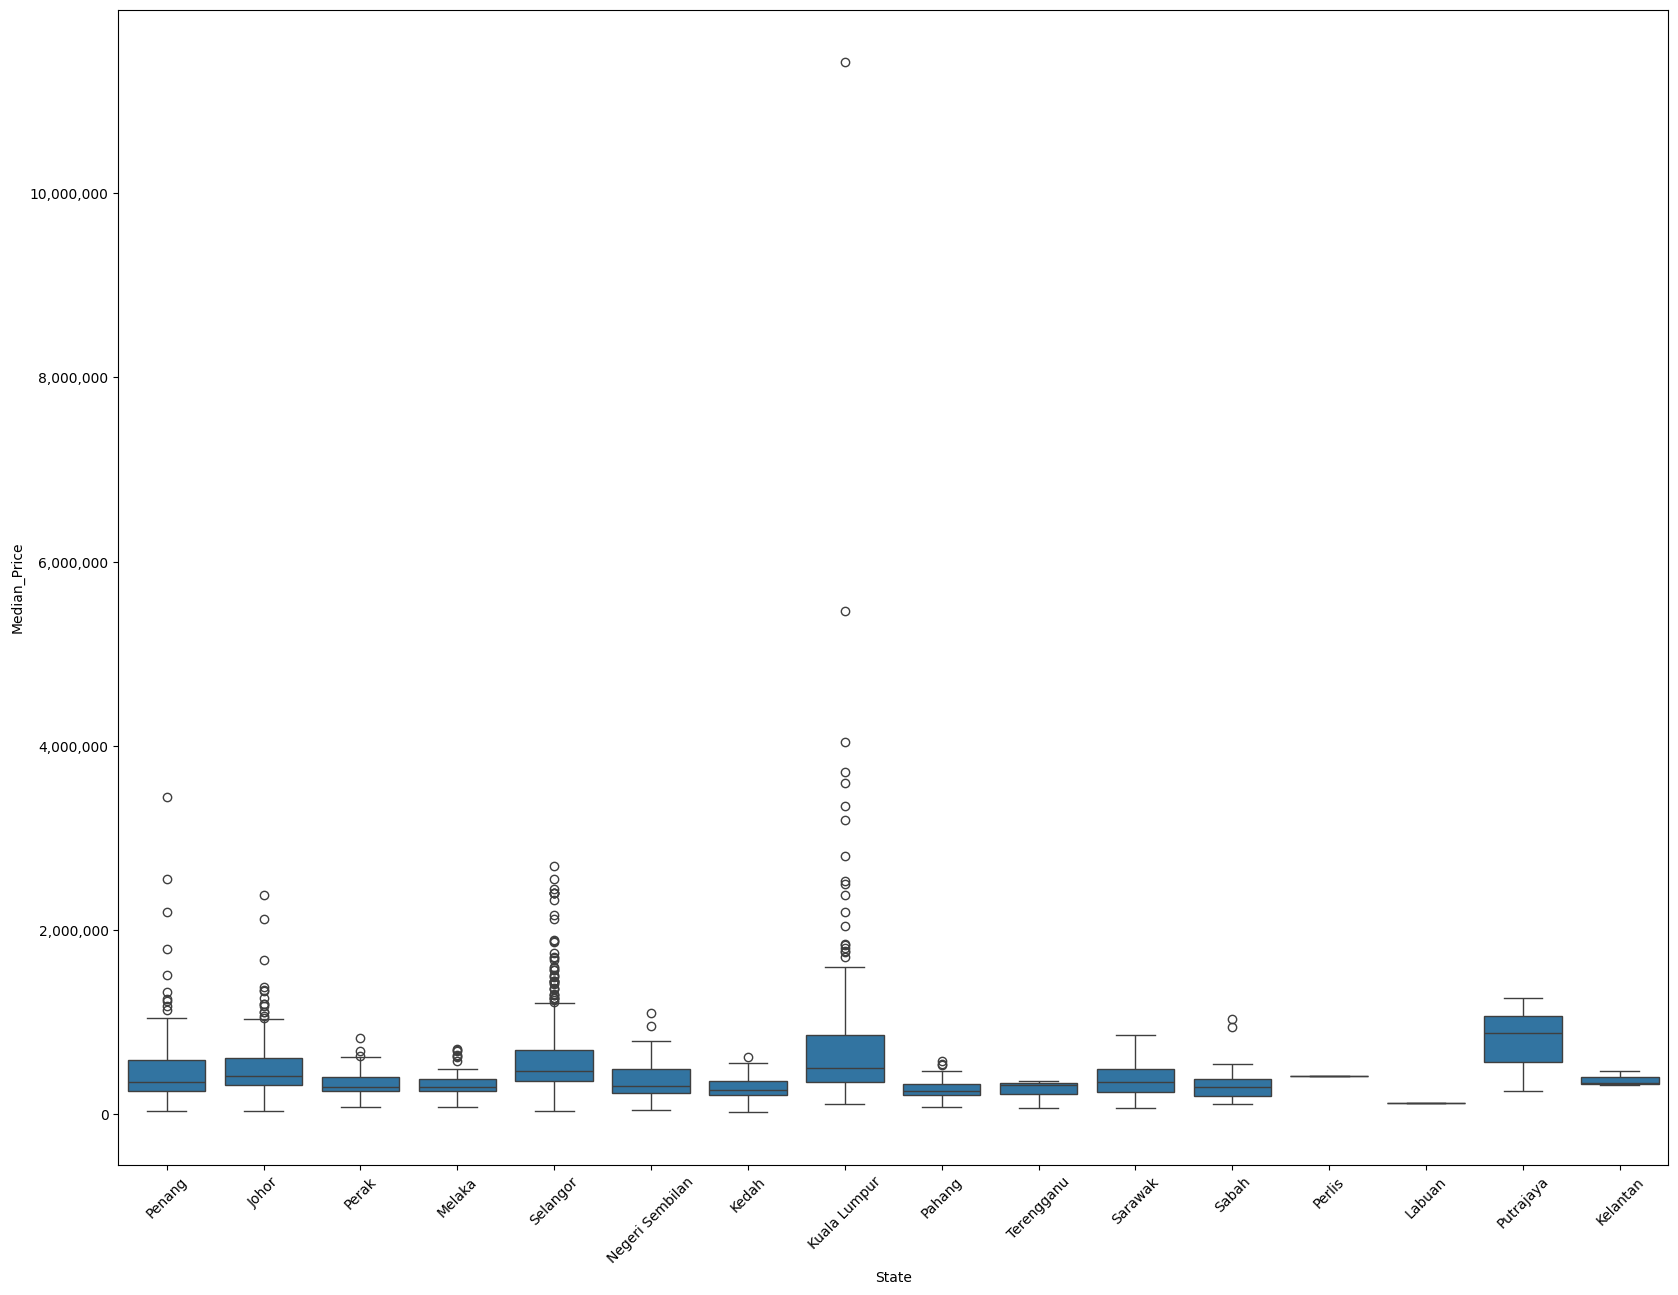

In [6]:
# Boxplot used to compare price by state

plt.figure(figsize=(20, 15))

sns.boxplot(x='State', y='Median_Price', data=df)
plt.xticks(rotation=45)
plt.locator_params(axis='y', nbins=10)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

In [7]:
from sklearn.preprocessing import LabelEncoder

# Make a copy
df_encoded = df.copy()

# Apply label encoding to all categorical columns
categorical_cols = ['Township', 'Area', 'State', 'Tenure', 'Type']

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Separate features and target
X = df_encoded.drop(columns='Median_Price')
y = df_encoded['Median_Price']

print(X.head())


   Township  Area  State  Tenure  Type  Median_PSF  Transactions
0       763   283      8       0    31       304.0           593
1       139   149      0       0    11       322.0           519
2      1299    61      9       0    31       130.0           414
3       760    42      5       0    31       218.0           391
4      1296   282      9       2    31       168.0           363


In [8]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Township      2000 non-null   int64  
 1   Area          2000 non-null   int64  
 2   State         2000 non-null   int64  
 3   Tenure        2000 non-null   int64  
 4   Type          2000 non-null   int64  
 5   Median_Price  2000 non-null   float64
 6   Median_PSF    2000 non-null   float64
 7   Transactions  2000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 125.1 KB


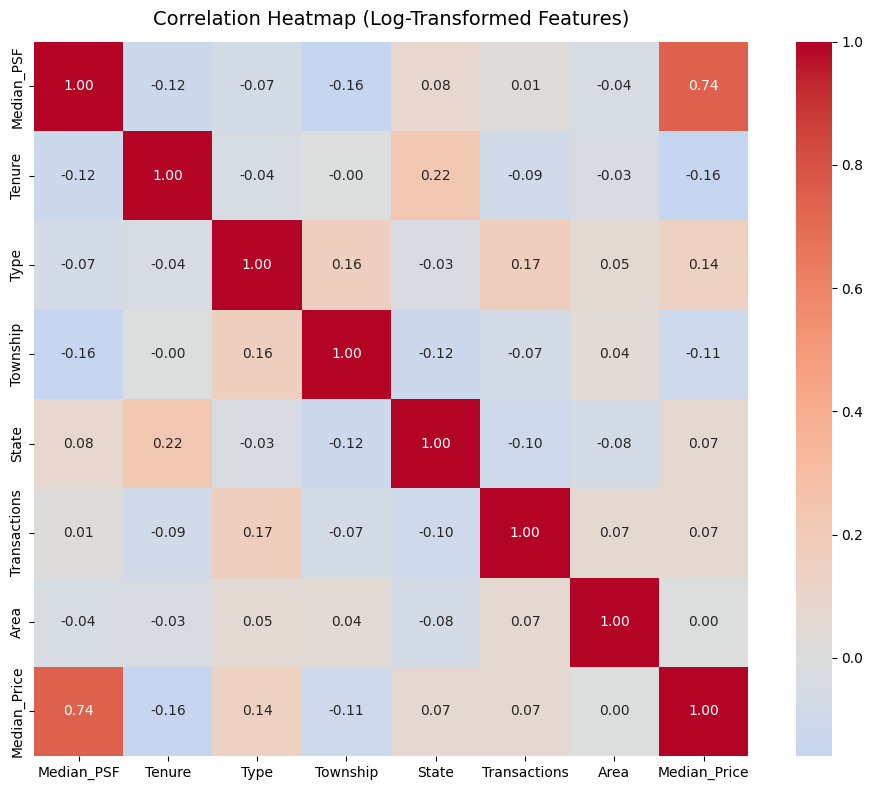

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Copy dataset to avoid changing the original
df_corr = df_encoded.copy()

# Log-transform selected columns safely
for col in ["Median_Price", "Median_PSF", "Transactions"]:
    if col in df_corr.columns:
        df_corr[col] = np.log1p(df_corr[col])  # log(1 + x) avoids log(0) issues

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Sort correlations based on target variable
target_corr = corr_matrix['Median_Price'].drop('Median_Price')
sorted_vars = target_corr.abs().sort_values(ascending=False).index.tolist()
ordered_vars = sorted_vars + ['Median_Price']
sorted_corr_matrix = corr_matrix.loc[ordered_vars, ordered_vars]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    sorted_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("Correlation Heatmap (Log-Transformed Features)", fontsize=14, pad=12)
plt.tight_layout()
plt.show()


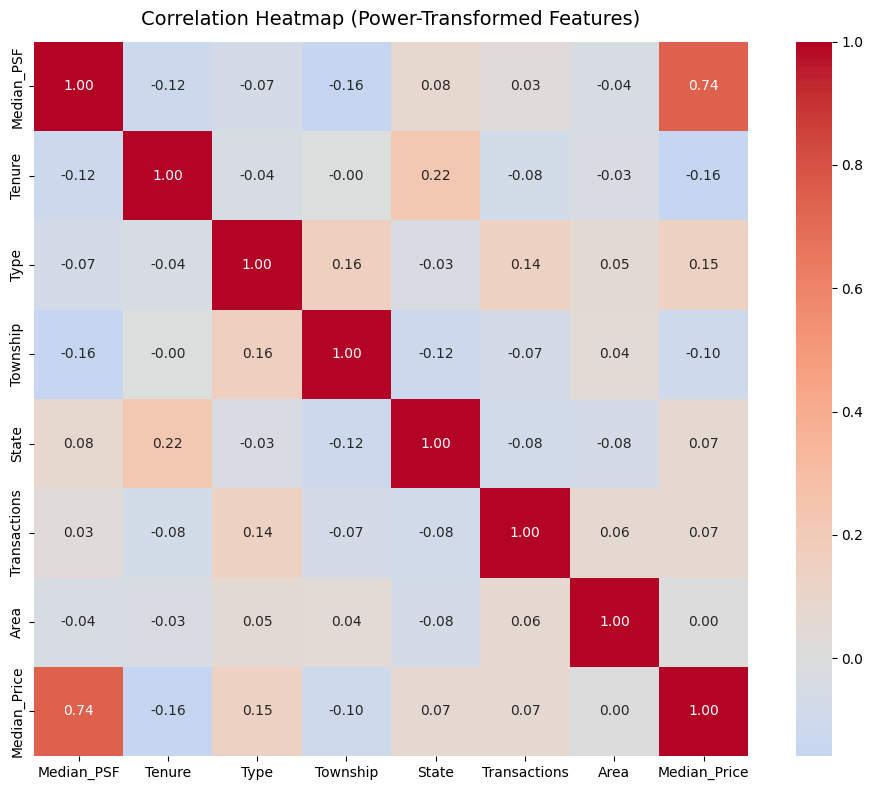

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Copy dataset to avoid changing the original ---
df_corr = df_encoded.copy()

# Apply PowerTransformer (Yeo–Johnson) safely ---
pt = PowerTransformer(method='yeo-johnson')

# Columns to transform
cols_to_transform = ["Median_Price", "Median_PSF", "Transactions"]

# Apply only if columns exist
for col in cols_to_transform:
    if col in df_corr.columns:
        reshaped = df_corr[[col]].values  # reshape for transformer
        df_corr[col] = pt.fit_transform(reshaped)

# Compute correlation matrix ---
corr_matrix = df_corr.corr()

# Sort correlations based on target variable ---
target_corr = corr_matrix['Median_Price'].drop('Median_Price')
sorted_vars = target_corr.abs().sort_values(ascending=False).index.tolist()
ordered_vars = sorted_vars + ['Median_Price']
sorted_corr_matrix = corr_matrix.loc[ordered_vars, ordered_vars]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    sorted_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("Correlation Heatmap (Power-Transformed Features)", fontsize=14, pad=12)
plt.tight_layout()
plt.show()


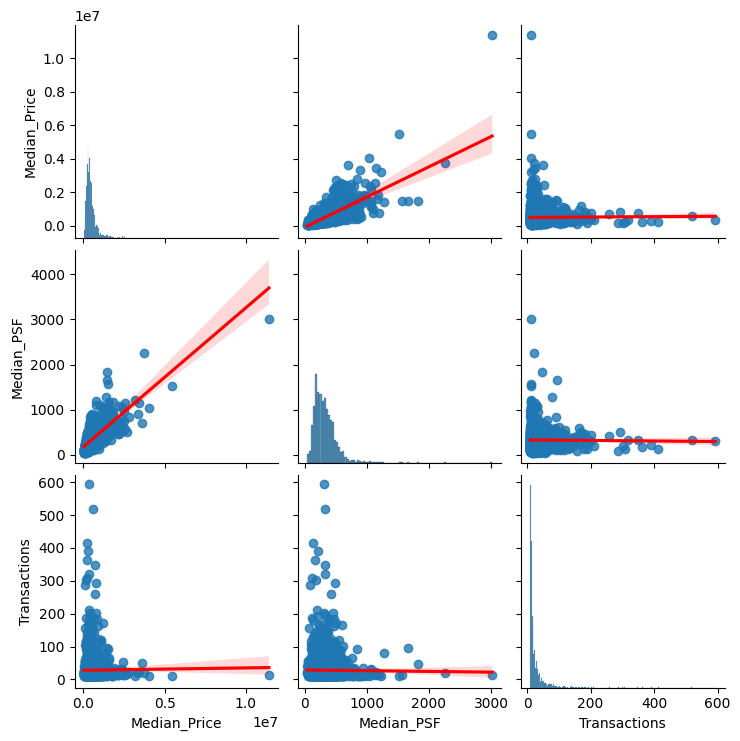

In [23]:
# Pairplot for observing linearlity
sns.pairplot(
    df[['Median_Price', 'Median_PSF', 'Transactions']],
    kind='reg',
    plot_kws={'line_kws': {'color': 'red'}}
)
plt.show()


In [27]:
# Save changes to another new CSV file
df_encoded.to_csv('malaysia_house_price_data_2025_label_encoded.csv', index=False)